## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Loading the dataset
boston_df = pd.read_csv('../Datasets/boston_house_prices.csv')

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Split data into features and target

In [4]:
# Splitting data into features and target
X = boston_df.drop(columns=['MEDV'])
y = boston_df['MEDV']

## Split into train and test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting the multiple regression model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Making predictions, R2 score and Feature importance

In [9]:
y_pred = model.predict(X_test)

# R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.4f}")

# Adjusted R^2 Score
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2 Score: {adjusted_r2:.4f}")

# Feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Importance:")
print(coefficients.sort_values(by='Coefficient', ascending=False))


R^2 Score: 0.6688
Adjusted R^2 Score: 0.6198

Feature Importance:
    Feature  Coefficient
5        RM     4.438835
3      CHAS     2.784438
8       RAD     0.262430
2     INDUS     0.040381
1        ZN     0.030110
11        B     0.012351
6       AGE    -0.006296
9       TAX    -0.010647
0      CRIM    -0.113056
12    LSTAT    -0.508571
10  PTRATIO    -0.915456
7       DIS    -1.447865
4       NOX   -17.202633


## Checking for Multi-Collinearity using VIF

In [10]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)



Variance Inflation Factors:
    Feature        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


## Adding Polynomial features

In [11]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [12]:
## Train test fit for polynomial features

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [13]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

# Predictions
y_pred_poly = model_poly.predict(X_test_poly)

# R^2 Score for polynomial features
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f"\nR^2 Score with Polynomial Features: {r2_poly:.4f}")

# Adjusted R^2 Score for polynomial features
n_poly = X_test_poly.shape[0]
p_poly = X_test_poly.shape[1]
adjusted_r2_poly = 1 - (1 - r2_poly) * (n_poly - 1) / (n_poly - p_poly - 1)
print(f"Adjusted R^2 Score with Polynomial Features: {adjusted_r2_poly:.4f}")



R^2 Score with Polynomial Features: 0.8056
Adjusted R^2 Score with Polynomial Features: 7.5454


## Comparing the Multiple Linear Regression vs Polynomial Regression


Comparison of Models:
                   Model       R^2  Adjusted R^2
0                 Linear  0.668759      0.619826
1  Polynomial (Degree 2)  0.805583      7.545374


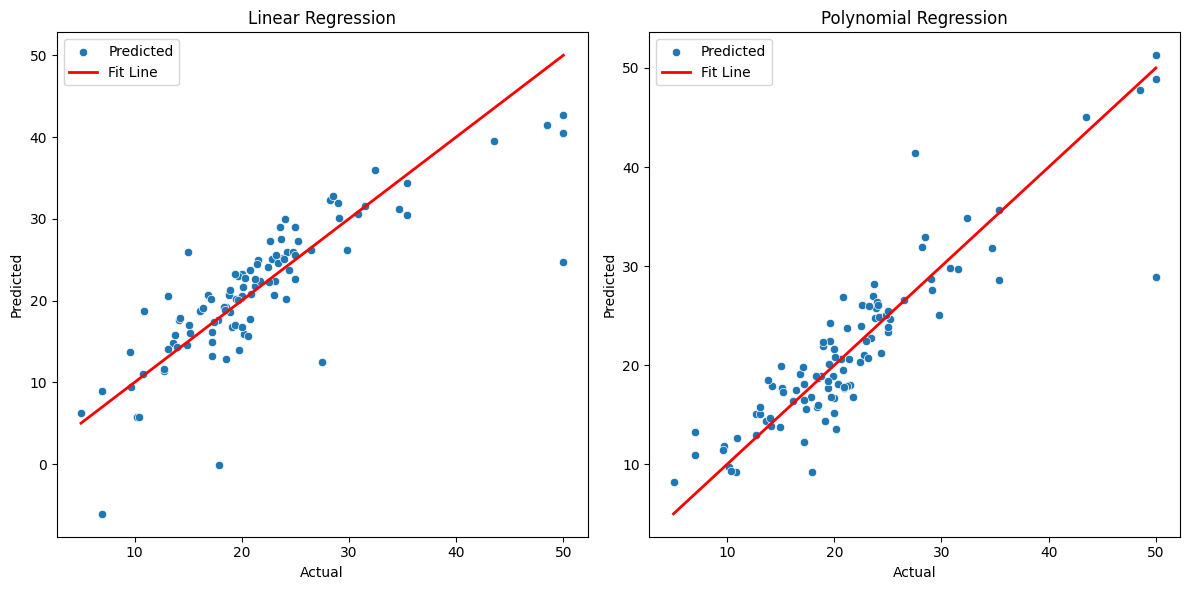

In [18]:
# Comparison of models
print("\nComparison of Models:")
comparison = pd.DataFrame({
    "Model": ["Linear", "Polynomial (Degree 2)"],
    "R^2": [r2, r2_poly],
    "Adjusted R^2": [adjusted_r2, adjusted_r2_poly]
})
print(comparison)

# Plot actual vs predicted values for both models with fit lines
plt.figure(figsize=(12, 6))

# Linear regression plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Fit Line")
plt.title("Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

# Polynomial regression plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_poly, y=y_pred_poly, label="Predicted")
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], color='red', lw=2, label="Fit Line")
plt.title("Polynomial Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

plt.tight_layout()
plt.show()
